In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import preprocessing

bodyfat = pd.read_csv("../data/bodyfat.csv")
X = bodyfat.drop(columns=["BodyFat","Density"])
y = bodyfat["BodyFat"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

kf = KFold(n_splits = 5, shuffle = True, random_state = 10)
cv_fold = np.zeros(len(y_train)).astype(int)

for i, (_, fold_indexes) in enumerate(kf.split(X_train)):
    cv_fold[fold_indexes] = int(i)

In [2]:
print('X_train:')
display(X_train.head())
display(X_train.shape)

print('\ncv_fold:')
display(cv_fold)

print('\ny_train:')
display(y_train.head())
display(y_train.shape)

X_train:


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
70,62,167.50,71.50,35.5,97.6,91.5,98.5,56.6,38.6,22.4,31.5,27.3,18.6
191,42,244.25,76.00,41.8,115.2,113.7,112.4,68.5,45.0,25.5,37.1,31.2,19.9
46,40,133.50,67.50,33.6,88.2,73.7,88.5,53.3,34.5,22.5,27.9,26.2,17.3
213,50,194.75,70.75,39.0,103.7,97.6,104.2,60.0,40.9,25.5,32.7,30.0,19.0
169,35,172.75,69.50,37.6,99.1,90.8,98.1,60.1,39.1,23.4,32.5,29.8,17.4


(201, 13)


cv_fold:


array([4, 0, 0, 2, 3, 0, 3, 1, 4, 4, 0, 2, 2, 4, 2, 4, 4, 2, 3, 0, 0, 1,
       3, 2, 1, 2, 1, 3, 3, 2, 4, 4, 2, 4, 3, 0, 3, 2, 1, 0, 4, 1, 2, 1,
       3, 2, 0, 0, 2, 1, 3, 2, 0, 2, 4, 0, 1, 4, 1, 0, 1, 0, 4, 0, 4, 4,
       1, 1, 1, 0, 1, 3, 1, 4, 3, 0, 0, 4, 0, 2, 1, 2, 2, 1, 2, 3, 4, 0,
       4, 4, 1, 0, 4, 3, 3, 1, 3, 2, 0, 1, 4, 1, 0, 1, 3, 2, 3, 4, 3, 0,
       1, 0, 2, 4, 2, 4, 0, 1, 3, 2, 1, 1, 4, 4, 1, 4, 4, 0, 2, 3, 2, 0,
       2, 3, 3, 3, 0, 3, 2, 4, 4, 4, 0, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 4,
       0, 0, 4, 4, 4, 1, 0, 2, 1, 0, 4, 2, 3, 1, 1, 2, 1, 0, 1, 0, 3, 0,
       1, 3, 2, 0, 2, 3, 4, 3, 4, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 4, 1,
       3, 3, 1])


y_train:


70     24.3
191    38.1
46     10.8
213    18.7
169    16.5
Name: BodyFat, dtype: float64

(201,)

In [3]:
def normalize_data(X_train:np.ndarray, X_test:np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Normalize the training and testing data using StandardScaler.
    
    Parameters:
    - X_train (np.ndarray): Training feature data.
    - X_test (np.ndarray): Testing feature data.
    
    Returns:
    - tuple[np.ndarray, np.ndarray]: Normalized training and testing feature data.
    """
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [4]:
X_train_norm, X_test_norm = normalize_data(X_train, X_test)
print('X_train_norm:')
display(pd.DataFrame(X_train_norm,columns=X_train.columns).head()   )
display(X_train_norm.shape)
print('Standard deviation:', np.std(X_train_norm, axis=0))


X_train_norm:


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.400681,-0.369547,0.386284,-1.005252,-0.373185,-0.092722,-0.203796,-0.542717,0.012316,-0.378185,-0.269119,-0.682443,0.397447
1,-0.208561,2.184283,1.553849,1.558080,1.743507,1.977039,1.678470,1.656375,2.609490,1.333121,1.562323,1.241899,1.774807
2,-0.369485,-1.500886,-0.651552,-1.778320,-1.503691,-1.752260,-1.557945,-1.152549,-1.651499,-0.322981,-1.446475,-1.225207,-0.979913
3,0.435136,0.537187,0.191690,0.418821,0.360441,0.475996,0.568069,0.085595,0.945675,1.333121,0.123333,0.649794,0.821250
4,-0.771796,-0.194855,-0.132634,-0.150808,-0.192786,-0.157985,-0.257962,0.104075,0.215220,0.173850,0.057924,0.551110,-0.873962


(201, 13)

Standard deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## b

In [5]:
import itertools

def best_subset_selection(X_train:np.ndarray, Y_train:np.ndarray)-> dict:
    """
    Perform best subset selection for linear regression. This function evaluates all possible combinations of features
    and selects the best model for each subset size based on R-squared.

    Parameters:
    - X_train (np.ndarray): Training feature data. Shape (n_samples, n_features).
    - Y_train (np.ndarray): Training target data. Shape (n_samples,).

    Returns:
    - dict: A dictionary where each key is the subset size (as a string) and the value is another dictionary containing:
        - 'best_model': The statsmodels OLS regression results object for the best model.
        - 'best_r2': The R-squared value of the best model.
        - 'best_features': A tuple of feature indices used in the best model.
    
    
    """
    
    # Useful dimensions
    n, p = X_train.shape

    # Initialize dictionary to store the best model for each subset size
    best_model_k = {}
    
    # Create model for no feature
    best_model_k['0'] = {}
    best_model_k['0']['best_model'] = sm.OLS(Y_train, np.ones((len(Y_train),1))).fit()
    best_model_k['0']['best_r2'] = best_model_k['0']['best_model'].rsquared
    best_model_k['0']['best_features'] = []
    tests_made = [()]
    
    for k in range(1, p+1):
        best_r2 = 0
        best_features = [] 
        best_model = []
        
        # Create every model with k features (excluding intercept)
        for feature_combination in itertools.combinations(range(p), k):
            X_train_aux  = sm.add_constant(X_train[:,feature_combination])
            model = sm.OLS(Y_train, X_train_aux).fit()
            tests_made.append(feature_combination)
            if model.rsquared > best_r2:
                best_r2 = model.rsquared
                best_model = model
                best_features = feature_combination

        # Store the best model for this subset size
        best_model_k[str(k)] = {
            'best_model': best_model,
            'best_r2': best_r2,
            'best_features': list(best_features)
        }

    # Sanity checks
    assert len(tests_made) == 2**p, "Number of feature subsets evaluated does not match expected count."
    assert len(tests_made) == len(set(tests_made)), "Duplicate feature subsets were evaluated."
    assert len(best_model_k.keys()) == p + 1, "Best model dictionary does not contain expected number of entries."
    assert not(any([best_model_k[k]['best_model'] == [] for k in best_model_k.keys()])), "Not all best models are valid."


    return best_model_k


In [22]:
def foward_stepwise_selection(X_train:np.ndarray, Y_train:np.ndarray)-> dict:
    """
    Function to perform forward stepwise selection for linear regression. This function iteratively adds features
    to the model and selects the best model for each subset size based on R-squared. Only one feature is added at each step.


    Parameters:
    - X_train (np.ndarray): Training feature data. Shape (n_samples, n_features).
    - Y_train (np.ndarray): Training target data. Shape (n_samples,).

    Returns:
    - dict: A dictionary where each key is the subset size (as a string) and the value is another dictionary containing:
        - 'best_model': The statsmodels OLS regression results object for the best model.
        - 'best_r2': The R-squared value of the best model.
        - 'best_features': A tuple of feature indices used in the best model.
    
    
    """
    
    # Useful dimensions
    n, p = X_train.shape

    # Initialize dictionary to store the best model for each subset size
    best_model_k = {}
    
    # Create model for no feature
    best_model_k['0'] = {}
    best_model_k['0']['best_model'] = sm.OLS(Y_train, np.ones((len(Y_train),1))).fit()
    best_model_k['0']['best_r2'] = best_model_k['0']['best_model'].rsquared
    best_model_k['0']['best_features'] = []

    # Variables to keep track of features
    remaining_features = list(range(p))
    current_features = []

    for k in range(1, p+1):
        # Initialize variables for this step
        tests_made = []

        best_r2 = 0
        best_features = [] 
        best_model = []

        # Create every model with k features (excluding intercept)
        for new_feature in remaining_features:
            feature_combination_list = current_features + [new_feature]
            feature_combination_list.sort()
            
            X_train_aux  = sm.add_constant(X_train[:, feature_combination_list])
            model = sm.OLS(Y_train, X_train_aux).fit()
            tests_made.append(feature_combination_list)
            
            # Check if this model is the best so far
            if model.rsquared > best_r2:
                best_r2 = model.rsquared
                best_model = model
                best_features = feature_combination_list
        
        # Move best feature for k from the remainig_features list to current_features
        remaining_features = list(set(remaining_features) - set(best_features))
        remaining_features.sort()
        current_features = list(set(best_features + current_features))
        current_features.sort()
        
        # Store the best model for this subset size
        best_model_k[str(k)] = {
            'best_model': best_model,
            'best_r2': best_r2,
            'best_features': current_features.copy()
        }

        assert len(tests_made) == p +1 - k, "Number of feature subsets evaluated does not match expected count."
        assert len(tests_made) == len(set(tuple(sorted(test)) for test in tests_made)), "Duplicate feature subsets were evaluated."
        assert all([len(test) == k for test in tests_made]), "Not all tested features added have size k."
        assert (best_model_k[str(k-1)]['best_features'] in tests_made[i] for i in tests_made), "All tests must include previously selected features."

    assert len(best_model_k.keys()) == p + 1, "Best model dictionary does not contain expected number of entries."
    assert not(any([best_model_k[k]['best_model'] == [] for k in best_model_k.keys()])), "Not all best models are valid."

    return best_model_k


In [23]:
def backward_stepwise_selection(X_train:np.ndarray, Y_train:np.ndarray)-> dict:
    """
    Function to perform backward stepwise selection for linear regression. This function iteratively removes features
    from the model and selects the best model for each subset size based on R-squared. Only one feature is removed at each step.


    Parameters:
    - X_train (np.ndarray): Training feature data. Shape (n_samples, n_features).
    - Y_train (np.ndarray): Training target data. Shape (n_samples,).

    Returns:
    - dict: A dictionary where each key is the subset size (as a string) and the value is another dictionary containing:
        - 'best_model': The statsmodels OLS regression results object for the best model.
        - 'best_r2': The R-squared value of the best model.
        - 'best_features': A tuple of feature indices used in the best model.
    
    
    """
    
    # Useful dimensions
    n, p = X_train.shape

    # Initialize dictionary to store the best model for each subset size
    best_model_k = {}
    all_features = list(range(p))
    
    # Create model for all features 
    best_model_k[f'{p}'] = {}
    best_model_k[f'{p}']['best_model'] = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
    best_model_k[f'{p}']['best_r2'] = best_model_k[f'{p}']['best_model'].rsquared
    best_model_k[f'{p}']['best_features'] = list(all_features)
    
    # Variables to keep track of features
    current_features = all_features
    deleted_features = []

    for k in range(1, p+1):
        # Initialize variables for this step
        tests_made = []

        best_r2 = 0
        best_features = [] 
        best_model = []

        # Create every model with k features (excluding intercept)
        for new_feature in current_features:
            feature_combination_list = current_features.copy()
            feature_combination_list.remove(new_feature)
            X_train_aux  = sm.add_constant(X_train[:, feature_combination_list])
            model = sm.OLS(Y_train, X_train_aux).fit()
            tests_made.append(feature_combination_list)
            
            # Check if this model is the best so far
            if model.rsquared > best_r2:
                best_r2 = model.rsquared
                best_model = model
                best_features = feature_combination_list

        
        # Update current features and deleted features lists
        deleted_features += (list(set(current_features) - set(best_features)))
        current_features = best_features

        
        # Store the best model for this subset size
        best_model_k[str(p-k)] = {
            'best_model': best_model,
            'best_r2': best_r2,
            'best_features': current_features.copy()
        }

        # Sanity checks
        assert len(tests_made) == p-k+1, "Number of feature subsets evaluated does not match expected count."
        assert len(tests_made) == len(set(tuple(sorted(test)) for test in tests_made)), "Duplicate feature subsets were evaluated."
        assert all([len(test) == p-k for test in tests_made]), "Not all tested features added have size p-k."
        assert (tests_made[i] in best_model_k[str(p-k+1)]['best_features'] for i in tests_made), "All tests must be included in previously selected features."
        assert len(deleted_features) == k, "Number of deleted features does not match expected count."

    # Create model for no feature
    best_model_k['0'] = {}
    best_model_k['0']['best_model'] = sm.OLS(Y_train, np.ones((len(Y_train),1))).fit()
    best_model_k['0']['best_r2'] = best_model_k['0']['best_model'].rsquared
    best_model_k['0']['best_features'] = []
    
    # Sanity checks
    assert len(best_model_k.keys()) == p + 1, "Best model dictionary does not contain expected number of entries."
    assert not(any([best_model_k[k]['best_model'] == [] for k in best_model_k.keys()])), "Not all best models are valid."
    
    best_model_k = dict(sorted(best_model_k.items(), key=lambda x: int(x[0])))
    return best_model_k

models_backward = backward_stepwise_selection(X_train.values, y_train.values)


In [24]:
models_forward = foward_stepwise_selection(X_train.values, y_train.values)
models_best = best_subset_selection(X_train.values, y_train.values)
models_backward = backward_stepwise_selection(X_train.values, y_train.values)


In [25]:
print(models_best)
print(models_forward)
print(models_backward)

tol = 1e-8
for key in models_best.keys():
    assert models_best[key]['best_r2'] + tol >= models_forward[key]['best_r2'], "Best subset selection should have R2 greater than or equal to forward stepwise selection."
    assert models_best[key]['best_r2'] + tol >= models_backward[key]['best_r2'], "Best subset selection should have R2 greater than or equal to backward stepwise selection."   
print("All checks passed successfully.")

{'0': {'best_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000131280A06B0>, 'best_r2': np.float64(0.0), 'best_features': []}, '1': {'best_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000131280A0C50>, 'best_r2': np.float64(0.6404157973526722), 'best_features': [5]}, '2': {'best_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000131280A05F0>, 'best_r2': np.float64(0.693716876511187), 'best_features': [1, 5]}, '3': {'best_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000131280A00B0>, 'best_r2': np.float64(0.7100124087139327), 'best_features': [1, 5, 12]}, '4': {'best_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000013128093770>, 'best_r2': np.float64(0.7192801308495235), 'best_features': [1, 5, 10, 12]}, '5': {'best_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001

## c

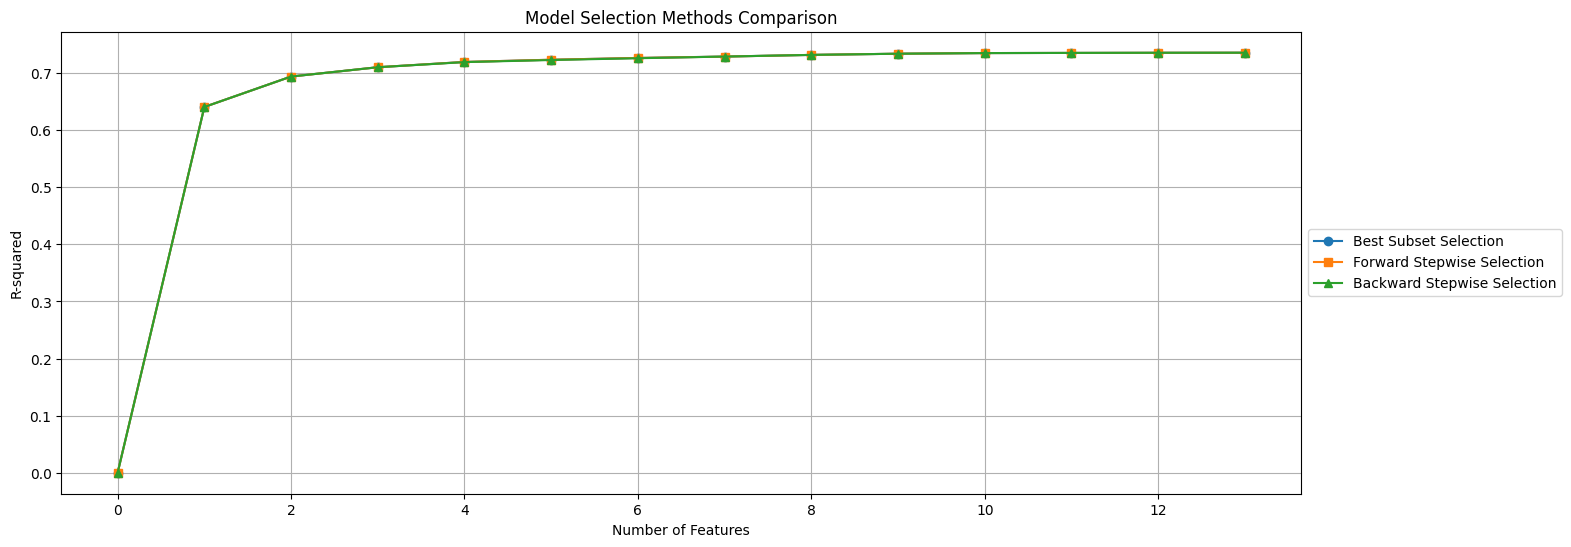

In [26]:
keys = [int(x) for x in  list(models_best.keys())]
models_best_r2 = [models_best[str(k)]['best_r2'] for k in keys]
models_backward_r2 = [models_backward[str(k)]['best_r2'] for k in keys]
models_forward_r2 = [models_forward[str(k)]['best_r2'] for k in keys]


plt.figure(figsize=(16,6))
plt.plot(keys, models_best_r2, marker='o', label='Best Subset Selection')
plt.plot(keys, models_forward_r2, marker='s', label='Forward Stepwise Selection')
plt.plot(keys, models_backward_r2, marker='^', label='Backward Stepwise Selection')
plt.xlabel('Number of Features')
plt.ylabel('R-squared')
plt.title('Model Selection Methods Comparison')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

## d

In [27]:
from sklearn.metrics import mean_squared_error

alphas = 10**np.linspace(5,-2,100)

mean_cv_error = {}
for alpha_0 in alphas:
    fold_error = []
    for test_fold in np.unique(cv_fold):
        
        # Split data into training and testing for the current fold
        x_train_fold = X_train[cv_fold != test_fold] 
        y_train_fold = y_train[cv_fold != test_fold]
        x_test_fold = X_train[cv_fold == test_fold]
        y_test_fold = y_train[cv_fold == test_fold]

        # Normalize data
        x_train_fold, x_test_fold = normalize_data(x_train_fold, x_test_fold)
        
        # Train and evaluate Lasso model
        model_ = Lasso(alpha=alpha_0).fit(x_train_fold, y_train_fold)
        yhat = model_.predict(x_test_fold)
        fold_error.append(mean_squared_error(yhat, y_test_fold))

    mean_cv_error[alpha_0] = np.mean(fold_error)

Text(0.5, 1.0, 'Lasso Regression: Mean CV Error vs Alpha')

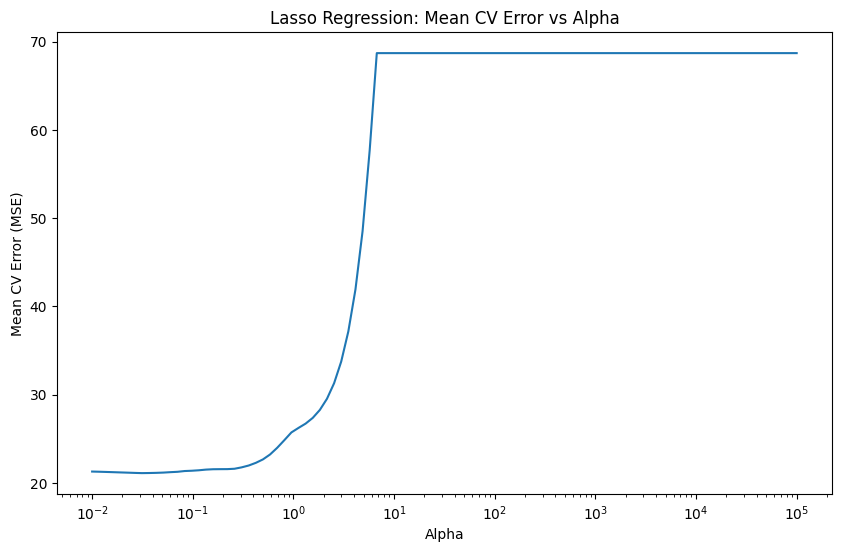

In [28]:
plt.figure(figsize=(10,6))
plt.plot(list(mean_cv_error.keys()), list(mean_cv_error.values()))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean CV Error (MSE)')
plt.title('Lasso Regression: Mean CV Error vs Alpha')


In [29]:
best_alpha = min(mean_cv_error, key=mean_cv_error.get)
print('Best Alpha:', best_alpha)
print('Minimum Mean CV Error:', mean_cv_error[best_alpha])

Best Alpha: 0.031257158496882355
Minimum Mean CV Error: 21.122532003961116


In [30]:
# Train best Lasso model
X_train_norm, X_test_norm = normalize_data(X_train, X_test)
lasso_model = Lasso(alpha=best_alpha).fit(X_train_norm, y_train)
print(lasso_model.coef_)


[ 0.62821524 -2.59442678 -0.20642187 -0.9040139  -0.23080468 10.04281614
 -1.30107934  1.24593471  0.02149373  0.23701975  0.68679073  0.78870312
 -1.78343953]


## e

In [31]:
# Evaluate Lasso model on test set
yhat = lasso_model.predict(X_test_norm)
lasso_test_error =  mean_squared_error(yhat, y_test)


# Evaluate all models in best subset selection on test set
models_best_error = {}
models_best_best_features = {}
for key in models_best.keys():
    y_hat = models_best[key]['best_model'].predict(sm.add_constant(X_test.values[:,models_best[key]['best_features']]))
    models_best_error[key] =  mean_squared_error(y_hat, y_test)
    models_best_best_features[key] = models_best[key]['best_features']

# Evalueate all models in forward stepwise selection on test set
models_forward_error = {}
models_forward_best_features = {}
for key in models_forward.keys():
    y_hat = models_forward[key]['best_model'].predict(sm.add_constant(X_test.values[:,models_forward[key]['best_features']]))
    models_forward_error[key] =  mean_squared_error(y_hat, y_test)
    models_forward_best_features[key] = models_forward[key]['best_features']

# Evalueate all models in backward stepwise selection on test set
models_backward_error = {}
for key in models_backward.keys():
    y_hat = models_backward[key]['best_model'].predict(sm.add_constant(X_test.values[:,models_backward[key]['best_features']]))
    models_backward_error[key] =  mean_squared_error(y_hat, y_test)



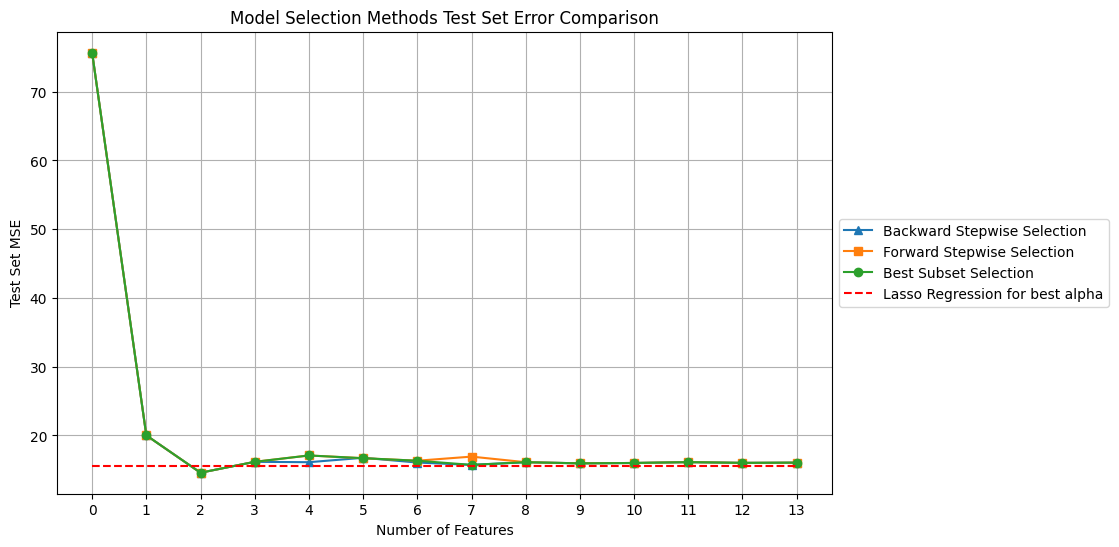

In [32]:
plt.figure(figsize=(10,6))
plt.plot(models_backward_error.keys(), models_backward_error.values(), marker='^', label='Backward Stepwise Selection')
plt.plot(models_forward_error.keys(), models_forward_error.values(), marker='s', label='Forward Stepwise Selection')
plt.plot(models_best_error.keys(), models_best_error.values(), marker='o', label='Best Subset Selection')
plt.plot(models_best_error.keys(), [lasso_test_error]*len(models_best_error.keys()), color='red', label='Lasso Regression for best alpha', marker='', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Test Set MSE')
plt.title('Model Selection Methods Test Set Error Comparison')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [34]:
# table of test errors
print("Number of Features | Best Subset MSE | Forward Stepwise MSE | Backward Stepwise MSE")
for k in models_best_error.keys():
    print(f"{k:>18} | {models_best_error[k]:>15.4f} | {models_forward_error[k]:>19.4f} | {models_backward_error[k]:>20.4f}")
print(f"Lasso Regression Test Set MSE: {lasso_test_error:.4f}")

Number of Features | Best Subset MSE | Forward Stepwise MSE | Backward Stepwise MSE
                 0 |         75.6775 |             75.6775 |              75.6775
                 1 |         20.0120 |             20.0120 |              20.0120
                 2 |         14.5768 |             14.5768 |              14.5768
                 3 |         16.1624 |             16.1624 |              16.1624
                 4 |         17.0868 |             17.0868 |              16.1075
                 5 |         16.6883 |             16.6883 |              16.7492
                 6 |         16.3233 |             16.3233 |              16.0581
                 7 |         15.7188 |             16.9196 |              15.7188
                 8 |         16.1061 |             16.1061 |              16.1061
                 9 |         15.9418 |             15.9418 |              15.9418
                10 |         15.9948 |             15.9948 |              15.9948
              

In [47]:
best_features = X_train.columns[models_best_best_features['2']]
print(best_features)
print(models_best['2']['best_model'].params)


Index(['Weight', 'Abdomen'], dtype='object')
[-45.63363482  -0.14301023   0.97553166]
